In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, GlobalMaxPooling1D, Dense, LSTM
from tensorflow.keras.models import Model

In [13]:
data=pd.read_csv(r"D:\Downloads\nlp-getting-started\train.csv")
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [14]:
data=data.drop('keyword', axis=1)
data=data.drop('location', axis=1)
data=data.drop('id', axis=1)
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [15]:
Y=data['target'].values

In [ ]:
# Splitting dataset, text data in pandas format only i.e. dataframe

In [18]:
df_train, df_test, Y_train, Y_test=train_test_split(data['text'], Y, test_size=0.33)
df_train.shape, Y_train.shape, df_test.shape, Y_test.shape

((5100,), (5100,), (2513,), (2513,))

In [83]:
#Now converting into word embeddings
MAX_VOCAB_SIZE=500
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequence_train=tokenizer.texts_to_sequences(df_train)
sequence_test=tokenizer.texts_to_sequences(df_test)

In [84]:
sequence_train[0]

[21, 11, 221, 328, 101, 67, 15, 9, 15, 3, 1, 2]

In [85]:
# Now padding the sequence as all sequences are of unequal length

In [86]:
word2idx=tokenizer.word_index
V=len(word2idx)
print(V)

17072


In [87]:
data_train=pad_sequences(sequence_train)
T=data_train.shape[1]

In [88]:
data_test=pad_sequences(sequence_test, maxlen=T)
data_test.shape

(2513, 25)

In [89]:
D=10
M=50

i=Input(shape=(T,))
x=Embedding(V+1, D)(i)
x=SimpleRNN(M, return_sequences=True)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(1, activation='sigmoid')(x)
model=Model(i, x)

In [90]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [91]:
r=model.fit(data_train, Y_train, epochs=7, validation_data=(data_test, Y_test))

Epoch 1/7
160/160 [==============================] - 5s 34ms/step - loss: 0.6598 - accuracy: 0.6165 - val_loss: 0.5889 - val_accuracy: 0.7135
Epoch 2/7
160/160 [==============================] - 5s 30ms/step - loss: 0.5141 - accuracy: 0.7616 - val_loss: 0.5165 - val_accuracy: 0.7545
Epoch 3/7
160/160 [==============================] - 5s 30ms/step - loss: 0.4681 - accuracy: 0.7945 - val_loss: 0.5199 - val_accuracy: 0.7565
Epoch 4/7
160/160 [==============================] - 5s 31ms/step - loss: 0.4335 - accuracy: 0.8053 - val_loss: 0.5074 - val_accuracy: 0.7620
Epoch 5/7
160/160 [==============================] - 5s 29ms/step - loss: 0.4174 - accuracy: 0.8245 - val_loss: 0.5107 - val_accuracy: 0.7577
Epoch 6/7
160/160 [==============================] - 5s 30ms/step - loss: 0.4069 - accuracy: 0.8239 - val_loss: 0.5080 - val_accuracy: 0.7585
Epoch 7/7
160/160 [==============================] - 5s 30ms/step - loss: 0.3858 - accuracy: 0.8388 - val_loss: 0.5179 - val_accuracy: 0.7553


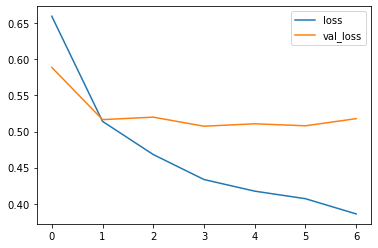

In [92]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

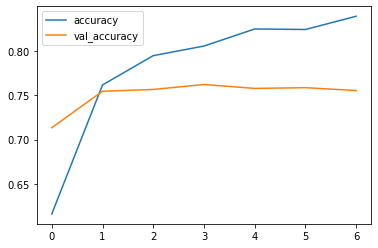

In [93]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()